In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Предсказать атмосферное давление в Шанхае

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

season: season of data in this row

PM: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (Celsius Degree)

TEMP: Temperature (Celsius Degree)

HUMI: Humidity (%)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

precipitation: hourly precipitation (mm)

Iprec: Cumulated precipitation (mm)

In [2]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [3]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


In [4]:
data = data.dropna() # удаляем все NaN

In [5]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (21436, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
26310,26311,2013,1,1,6,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
26311,26312,2013,1,1,7,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
26312,26313,2013,1,1,8,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
26313,26314,2013,1,1,9,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
26314,26315,2013,1,1,10,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


<AxesSubplot:>

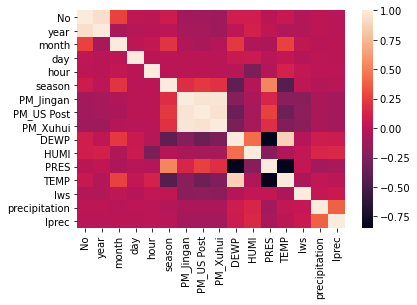

In [6]:
list_of_column_names = data.columns # строим тепловую карту скоррелированных признаков
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

Нормализация

In [7]:
data = (data - data.mean()) / data.std()

In [8]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (21436, 17)


,DEWP,HUMI,Iprec,Iws,No,PM_Jingan,PM_US Post,PM_Xuhui,PRES,TEMP,cbwd,day,hour,month,precipitation,season,year
26304,-1.704071,0.018112,-0.128254,0.173173,-1.747421,0.166925,0.366599,0.252477,0.774887,-1.961308,NaN,-1.676535,-1.754596,-1.557791,-0.129194,1.347979,-1.207702
26305,-1.704071,0.018112,-0.128254,0.202715,-1.747285,0.187698,0.505240,0.272791,0.774887,-1.961308,NaN,-1.676535,-1.606006,-1.557791,-0.129194,1.347979,-1.207702
26307,-1.598843,0.317001,-0.128254,0.247030,-1.747014,0.312340,0.551454,0.313421,0.774887,-1.961308,NaN,-1.676535,-1.308825,-1.557791,-0.129194,1.347979,-1.207702
26308,-1.598843,0.628044,-0.128254,0.291344,-1.746878,0.353887,0.528347,0.374365,0.774887,-2.072632,NaN,-1.676535,-1.160234,-1.557791,-0.129194,1.347979,-1.207702
26309,-1.598843,0.628044,-0.128254,0.320887,-1.746743,0.312340,0.551454,0.435309,0.774887,-2.072632,NaN,-1.676535,-1.011644,-1.557791,-0.129194,1.347979,-1.207702
26310,-1.598843,0.628044,-0.128254,0.335658,-1.746607,0.333113,0.528347,0.374365,0.774887,-2.072632,NaN,-1.676535,-0.863053,-1.557791,-0.129194,1.347979,-1.207702
26311,-1.598843,0.965606,-0.128254,-0.713111,-1.746472,0.312340,0.597668,0.516567,0.886541,-2.183956,NaN,-1.676535,-0.714463,-1.557791,-0.129194,1.347979,-1.207702
26312,-1.704071,0.619757,-0.128254,-0.698340,-1.746336,0.395434,0.505240,0.577511,0.886541,-2.183956,NaN,-1.676535,-0.565872,-1.557791,-0.129194,1.347979,-1.207702
26313,-1.493614,-0.465303,-0.128254,-0.654026,-1.746200,0.312340,0.459026,0.658770,0.998194,-1.516012,NaN,-1.676535,-0.417282,-1.557791,-0.129194,1.347979,-1.207702
26314,-1.598843,-1.107278,-0.128254,-0.594940,-1.746065,0.499301,0.505240,0.597826,0.998194,-1.293365,NaN,-1.676535,-0.268691,-1.557791,-0.129194,1.347979,-1.207702


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Разбиваем данные тест и трейн
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP']], data['PRES'], test_size=0.33)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [12]:
model = LinearRegression(normalize=True) # Линейная регрессия
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
predictions, y_test

(array([ 0.15281578,  1.36047422, -1.05484266, ...,  0.33860939,
        -1.05484266,  0.33860939]),
 29006   -0.564956
 43484    2.003076
 40863   -0.453302
 37466   -0.006688
 44792    1.221501
            ...   
 28212    0.328273
 36524    0.998194
 46087   -0.453302
 49124   -1.011570
 52022    1.556462
 Name: PRES, Length: 7074, dtype: float64)

In [14]:
mean_squared_error(predictions, y_test)

0.30598248588404087

Коэффициенты модели

In [15]:
w_0 = model.intercept_
w_1 = model.coef_[0]
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  0.002506363858327223
w_1 =  -0.8344727592857145


In [16]:
model.coef_

array([-0.83447276])

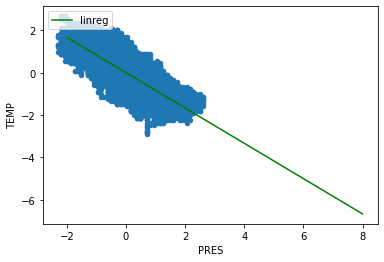

In [17]:
f = lambda x: w_0 + w_1 * x
x = np.linspace(-2, 8, 100)
y_1 = f(x)
 
data.plot(x='TEMP', y='PRES', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')

plt.ylabel( 'TEMP')
plt.xlabel('PRES')
plt.legend(loc='upper left')
plt.show()

In [25]:
# Используем все данные
X_train, X_test, y_train, y_test = train_test_split(data.drop(['PRES'], axis=1), data['PRES'], test_size=0.33)

In [26]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
mean_squared_error(predictions, y_test)

1.7228896881960656

In [28]:
model.coef_